### 데이터 불러오기 및 확인

![](2023-06-08-16-20-45.png)

In [946]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [947]:
df=pd.read_csv('./train.csv', header=0)
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [948]:
#결측치 확인
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [949]:
print(df.shape)
df.dtypes

(891, 12)


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### 데이터 전처리

In [950]:
# 나이를 예측하기 위해서 관련없는 columns 제거

# 결측치가 많은 Cabin을 없애고 Embarked의 결측치를 제거
# Cabin 열 제거
df.drop('Cabin', axis=1, inplace=True)

# Embarked 열의 결측치 제거
df.dropna(subset=['Embarked'], inplace=True)



# PassengerID, Name, Ticket 열 제거
df.drop('PassengerId', axis=1, inplace=True)
df.drop('Name', axis=1, inplace=True)
df.drop('Ticket', axis=1, inplace=True)


print(df.shape)
df.isnull().sum()

(889, 8)


Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      0
dtype: int64

In [951]:
# gender를 0과 1로 매핑
gender_map = {'male': 0, 'female': 1}
df['Sex'] = df['Sex'].map(gender_map)

# Embarked를 0,1,2로 매핑
Embarked_map = {'S': 1, 'C': 2, 'Q': 3}
df['Embarked'] = df['Embarked'].map(Embarked_map)

df_origin= df.copy()

df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1


### 1. 결측치 제거

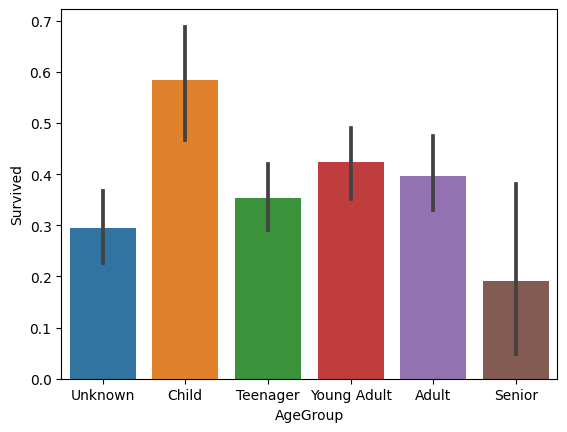

AgeGroup
Teenager       224
Young Adult    196
Adult          194
Unknown        177
Child           77
Senior          21
Name: count, dtype: int64

In [952]:
## 연속형 데이터인 나이를 범주형 데이터로 변환
## 가지고 있는 데이터가 Fare빼고 이산형 데이터기 때문에?
## 또 범주형은 정규화를 안해줄 수도 있음
df1 = df_origin.copy()
df1["Age"] = df1["Age"].fillna(-0.5)

bins = [-1, 0, 14, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df1['AgeGroup'] = pd.cut(df1["Age"], bins, labels = labels)

#draw a bar plot of Age vs. survival
sns.barplot(x="AgeGroup", y="Survived", data=df1)
plt.show()
df1['AgeGroup'].value_counts()

In [953]:
#결측치 제거
df_Age_drop = df1.dropna(subset=['Age'])
print(df_Age_drop.isnull().sum())

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
AgeGroup    0
dtype: int64


In [954]:
## AgeGroup 범주화
## 아까 말했듯 정규화를 안하기 위해서 Fare를 범주화

#AgeGroup 라벨링
age_mapping = {'Unknown': None,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
df_Age_drop['AgeGroup'] = df_Age_drop['AgeGroup'].map(age_mapping)

# Age 열 제거
df_Age_drop.drop('Age', axis=1, inplace=True)

#Fare 라벨링
df_Age_drop['FareBand'] = pd.qcut(df_Age_drop['Fare'], 4, labels = [1, 2, 3, 4])

# Fare 열 제거
df_Age_drop.drop('Fare', axis=1, inplace=True)


print(df_Age_drop['AgeGroup'].isnull().sum())
df_Age_drop.head()


177


,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareBand
0,0,3,0,1,0,1,2.0,1
1,1,1,1,1,0,2,4.0,4
2,1,3,1,0,0,1,3.0,2
3,1,1,1,1,0,1,3.0,4
4,0,3,0,0,0,1,3.0,2


In [955]:
df_Age_drop = df_Age_drop.dropna(subset=['AgeGroup'])
print(df_Age_drop.isnull().sum())

Survived    0
Pclass      0
Sex         0
SibSp       0
Parch       0
Embarked    0
AgeGroup    0
FareBand    0
dtype: int64


In [956]:
## 훈련 세트와 테스트 세트 분할
from sklearn.model_selection import train_test_split

# X와 y로 분할
X_drop = df_Age_drop.drop('Survived', axis=1)
y_drop = df_Age_drop['Survived']

# 학습 및 테스트 세트로 분할
X_train_drop, X_test_drop, y_train_drop, y_test_drop = train_test_split(X_drop, y_drop, test_size=0.2, random_state=42)


### 2. 결측치 대체

In [957]:
df2 = df_origin.copy()

# 결측치를 평균값으로 대체
df_Age_mean = df2.fillna(df2.mean())

# 결측치를 중앙값으로 대체
df_Age_median = df2.fillna(df2.median())


# 결측치를 최빈값으로 대체
#iloc는 중복되는 최빈값중 가장 앞의 값
df_Age_mode = df2.fillna(df2.mode().iloc[0])

print(df_Age_mean.isnull().sum(),'\n')
print(df_Age_median.isnull().sum(),'\n')
print(df_Age_mode.isnull().sum(),'\n')

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64 



In [958]:
## Agegroup 범주화

##df_Age_mean
df_Age_mean["Age"] = df_Age_mean["Age"].fillna(-0.5)

bins = [-1, 0, 14, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df_Age_mean['AgeGroup'] = pd.cut(df_Age_mean["Age"], bins, labels = labels)

##df_Age_median
df_Age_median["Age"] = df_Age_median["Age"].fillna(-0.5)

bins = [-1, 0, 14, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df_Age_median['AgeGroup'] = pd.cut(df_Age_median["Age"], bins, labels = labels)

##df_Age_mode
df_Age_mode["Age"] = df_Age_mode["Age"].fillna(-0.5)

bins = [-1, 0, 14, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df_Age_mode['AgeGroup'] = pd.cut(df_Age_mode["Age"], bins, labels = labels)



In [959]:
df_Age_mean

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup
0,0,3,0,22.000000,1,0,7.2500,1,Teenager
1,1,1,1,38.000000,1,0,71.2833,2,Adult
2,1,3,1,26.000000,0,0,7.9250,1,Young Adult
3,1,1,1,35.000000,1,0,53.1000,1,Young Adult
4,0,3,0,35.000000,0,0,8.0500,1,Young Adult
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,1,Young Adult
887,1,1,1,19.000000,0,0,30.0000,1,Teenager
888,0,3,1,29.642093,1,2,23.4500,1,Young Adult
889,1,1,0,26.000000,0,0,30.0000,2,Young Adult


In [960]:
# df_Age_mean AgeGroup 및 Fare 라벨링

#df_Age_mean 전처리
age_mapping = {'Unknown': None,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
df_Age_mean['AgeGroup'] = df_Age_mean['AgeGroup'].map(age_mapping)

# Age 열 제거
df_Age_mean.drop('Age', axis=1, inplace=True)

#Fare 라벨링
df_Age_mean['FareBand'] = pd.qcut(df_Age_mean['Fare'], 4, labels = [1, 2, 3, 4])

# Fare 열 제거
df_Age_mean.drop('Fare', axis=1, inplace=True)


print(df_Age_mean['AgeGroup'].isnull().sum())
df_Age_mean.head()


0


,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareBand
0,0,3,0,1,0,1,2.0,1
1,1,1,1,1,0,2,4.0,4
2,1,3,1,0,0,1,3.0,2
3,1,1,1,1,0,1,3.0,4
4,0,3,0,0,0,1,3.0,2


In [961]:
# df_Age_median AgeGroup 및 Fare 라벨링

#Age 라벨링
age_mapping = {'Unknown': None,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
df_Age_median['AgeGroup'] = df_Age_median['AgeGroup'].map(age_mapping)

# Age 열 제거
df_Age_median.drop('Age', axis=1, inplace=True)

#Fare 라벨링
df_Age_median['FareBand'] = pd.qcut(df_Age_median['Fare'], 4, labels = [1, 2, 3, 4])

# Fare 열 제거
df_Age_median.drop('Fare', axis=1, inplace=True)


print(df_Age_median['AgeGroup'].isnull().sum())
df_Age_median.head()


0


,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareBand
0,0,3,0,1,0,1,2.0,1
1,1,1,1,1,0,2,4.0,4
2,1,3,1,0,0,1,3.0,2
3,1,1,1,1,0,1,3.0,4
4,0,3,0,0,0,1,3.0,2


In [962]:
# df_Age_mode AgeGroup 및 Fare 라벨링


#Age 라벨링
age_mapping = {'Unknown': None,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
df_Age_mode['AgeGroup'] = df_Age_mode['AgeGroup'].map(age_mapping)

# Age 열 제거
df_Age_mode.drop('Age', axis=1, inplace=True)

#Fare 라벨링
df_Age_mode['FareBand'] = pd.qcut(df_Age_mode['Fare'], 4, labels = [1, 2, 3, 4])

# Fare 열 제거
df_Age_mode.drop('Fare', axis=1, inplace=True)


print(df_Age_mode['AgeGroup'].isnull().sum())
df_Age_mode.head()


0


,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareBand
0,0,3,0,1,0,1,2.0,1
1,1,1,1,1,0,2,4.0,4
2,1,3,1,0,0,1,3.0,2
3,1,1,1,1,0,1,3.0,4
4,0,3,0,0,0,1,3.0,2


In [963]:
## 훈련 세트와 테스트 세트 분할

from sklearn.model_selection import train_test_split

## df_Age_mean

# X와 y로 분할
X_mean = df_Age_mean.drop('Survived', axis=1)
y_mean = df_Age_mean['Survived']

# 학습 및 테스트 세트로 분할
X_train_mean, X_test_mean, y_train_mean, y_test_mean = train_test_split(X_mean, y_mean, test_size=0.2, random_state=42)

## df_Age_median

# X와 y로 분할
X_median = df_Age_median.drop('Survived', axis=1)
y_median = df_Age_median['Survived']

# 학습 및 테스트 세트로 분할
X_train_median, X_test_median, y_train_median, y_test_median = train_test_split(X_median, y_median, test_size=0.2, random_state=42)

## df_Age_mode

# X와 y로 분할
X_mode = df_Age_mode.drop('Survived', axis=1)
y_mode = df_Age_mode['Survived']

# 학습 및 테스트 세트로 분할
X_train_mode, X_test_mode, y_train_mode, y_test_mode = train_test_split(X_mode, y_mode, test_size=0.2, random_state=42)


### 3. 나이 예측을 통한 결측치 대체

In [964]:
## AgeGroup으로 범주화
df3 = df_origin.copy()
df3["Age"] = df3["Age"].fillna(-0.5)

bins = [-1, 0, 14, 25, 35, 60, np.inf]
labels = ['Unknown', 'Child', 'Teenager', 'Young Adult', 'Adult', 'Senior']
df3['AgeGroup'] = pd.cut(df3["Age"], bins, labels = labels)


In [965]:
# df_예측 AgeGroup 및 Fare 라벨링

#Age 라벨링
age_mapping = {'Unknown': None,'Child': 1, 'Teenager': 2, 'Young Adult': 3, 'Adult': 4, 'Senior': 5}
df3['AgeGroup'] = df3['AgeGroup'].map(age_mapping)

# Age 열 제거
df3.drop('Age', axis=1, inplace=True)

#Fare 라벨링
df3['FareBand'] = pd.qcut(df3['Fare'], 4, labels = [1, 2, 3, 4])

# Fare 열 제거
df3.drop('Fare', axis=1, inplace=True)


print(df3['AgeGroup'].isnull().sum())
df3.head()


177


,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,FareBand
0,0,3,0,1,0,1,2.0,1
1,1,1,1,1,0,2,4.0,4
2,1,3,1,0,0,1,3.0,2
3,1,1,1,1,0,1,3.0,4
4,0,3,0,0,0,1,3.0,2


In [966]:
# 177개의 결측치 data를 test set으로 분리

# 결측치가 있는 데이터를 선택하여 따로 변수에 저장
df_age_test = df3[df3['AgeGroup'].isnull()]

# 결측치가 없는 데이터를 선택하여 훈련 데이터로 사용할 변수에 저장
df_age_train = df3[df3['AgeGroup'].notnull()]

In [967]:
from sklearn.model_selection import train_test_split

# 결측치가 없는 데이터의 AgeGroup 속성을 x_train과 y_train으로 분할
X_not_NaN = df_age_train.drop('AgeGroup', axis=1)  # 'AgeGroup' 속성을 제외한 나머지 속성을 독립 변수로 설정
y_not_NaN = df_age_train['AgeGroup']  # 'AgeGroup' 속성을 종속 변수로 설정

# 결측치가 있는 데이터의 AgeGroup 속성을 x_test와 y_test로 분할
X_in_NaN = df_age_test.drop('AgeGroup', axis=1)  # 'AgeGroup' 속성을 제외한 나머지 속성을 독립 변수로 설정
y_in_NaN = df_age_test['AgeGroup']  # 'AgeGroup' 속성을 종속 변수로 설정

X_train, X_test, y_train, y_test = train_test_split(X_not_NaN, y_not_NaN, test_size=0.2, random_state=42)


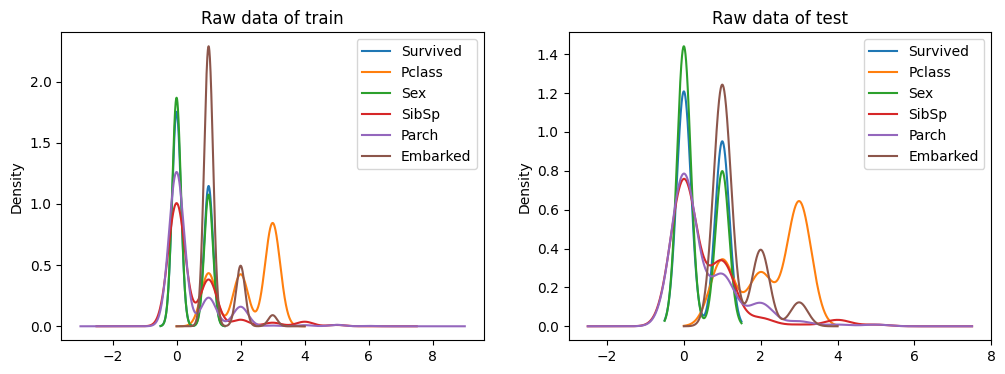

In [968]:
#범주형으로 어떻게 분포하고 있는지 한번 확인
fig, ax = plt.subplots(1,2,figsize=(12,4))
X_train.plot(kind='kde', title='Raw data of train', ax=ax[0])

X_test.plot(kind='kde', title='Raw data of test', ax=ax[1])

plt.show()


Train Score: 0.45694200351493847
Test Score: 0.4125874125874126


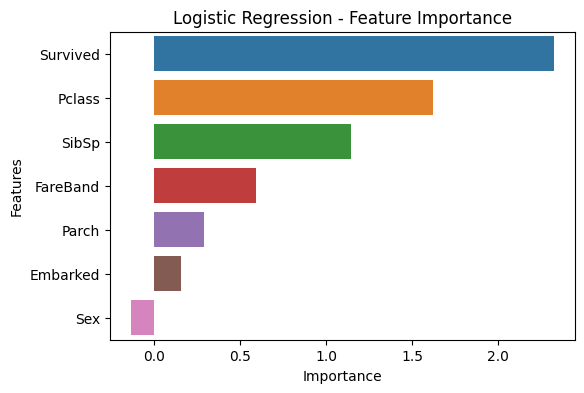

In [980]:
##로지스틱 회귀 특성중요도
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# 로지스틱 회귀 모델 학습
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

# 특성 중요도 계산
feature_importance = lr.coef_[0]

# 특성 중요도를 위한 데이터프레임 생성
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 특성 중요도 시각화
plt.figure(figsize=(6, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Logistic Regression - Feature Importance')
plt.show()


Mean accuracy of D_tree : 42.36 %
Mean accuracy of RF : 42.72 %
Mean accuracy of GNB : 38.14 %
Mean accuracy of KNN : 42.35 %
Mean accuracy of Ada : 43.76 %
Mean accuracy of QDA : 47.45 %
Mean accuracy of SVM_1 : 34.99 %
Mean accuracy of SVM_k : 39.90 %


c:\Users\rhkr3\anaconda3\envs\pandas_jm\Lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Mean accuracy of Voting : 43.77 %
Mean accuracy of Bagging : 43.76 %


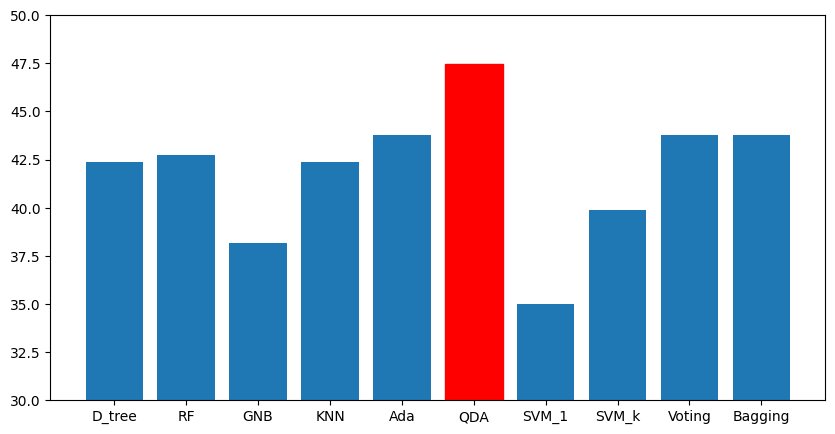

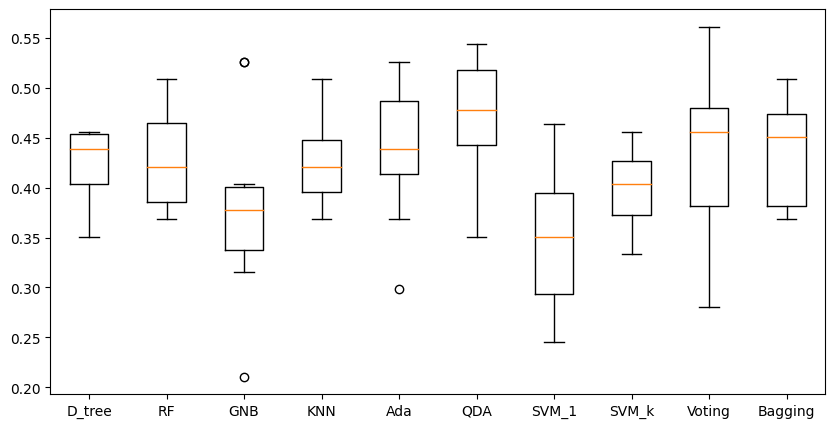

In [970]:
#다른 분류모델도 확인
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
# from xgboost import XGBClassifier



clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

# 사용할 분류기를 모두 지정
classifier = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              GaussianNB(),
              KNeighborsClassifier(),
              SVC(kernel='linear'),
              SVC(kernel='rbf'),
              AdaBoostClassifier(),
              QuadraticDiscriminantAnalysis(),
              VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                           ('2', RandomForestClassifier()),
                                           ('3', SVC(kernel='linear'))]),
              BaggingClassifier(estimator=clf3, n_estimators=10, random_state=0),
              
              ]

#각 분류기의 이름을 지정
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'Voting',
                    'Bagging',
                                        ]

#결과가 지정될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행해 결과를 저장
classifier_data = zip(classifier_names, classifier)
for classifier_name, classifier in classifier_data:
    #계층별 교차 검증 환경 설정
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    #교차 검증을 통해 정확도 계산
    accuracies = cross_val_score(classifier, X=X_train, y=y_train, cv = skf)
    #정확도의 평균값을 출력
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    
    
    #결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)
    
# 분류기별 정확도의 평균값을 막대 그래프로 출력
plt.figure(figsize=(10, 5))
plt.ylim([30, 50])
bars = plt.bar(modelnames, modelmeans)

# 가장 높은 값을 가진 막대의 색상 변경
max_index = np.argmax(modelmeans)
bars[max_index].set_color('red')

plt.show()

#분류기별 결과를 박스 그래프로 출력
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

In [971]:
## QDA 모델로 나이 예측 모델 학습 후 나이 예측 데이터 도출
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_in_NaN)

y_in_NaN=y_pred


In [972]:
## 나이를 예측하기 위해 나눠놨던 X_train, x_test, X_in_NaN 모두 합침
## Survived를 예측하기 위한 데이터 셋 준비
import pandas as pd
from sklearn.model_selection import train_test_split

X_combined = np.vstack(([X_train, X_test, X_in_NaN]))
y_combined = np.hstack(([y_train, y_test, y_in_NaN]))

# y_combined에 있던 'Age'속성 X_combined에 합치기
X_combined = pd.DataFrame(X_combined, columns=X_train.columns)
X_combined['AgeGroup'] = y_combined

# 생존율을 'y'로 대체
y_combined = X_combined['Survived']
X_combined.drop('Survived', axis=1, inplace=True)

print(X_combined)
print(y_combined)


# 학습 및 테스트 세트로 분할
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(X_combined, y_combined, 
                                                                                        test_size=0.2, random_state=42)


     Pclass  Sex  SibSp  Parch  Embarked  FareBand  AgeGroup
0         2    1      1      2         1         3       3.0
1         2    1      1      0         1         3       4.0
2         2    0      0      0         1         2       2.0
3         1    0      0      0         2         3       4.0
4         1    1      1      0         2         4       2.0
..      ...  ...    ...    ...       ...       ...       ...
884       3    0      0      0         2         1       2.0
885       3    1      8      2         1         4       1.0
886       3    0      0      0         1         2       2.0
887       3    0      0      0         1         1       2.0
888       3    1      1      2         1         3       4.0

[889 rows x 7 columns]
0      1
1      1
2      0
3      0
4      1
      ..
884    0
885    0
886    0
887    0
888    0
Name: Survived, Length: 889, dtype: int64


In [984]:
## 결측치 제거 데이터셋
print(X_train_drop.shape)

## 결측치 평균 대체 데이터셋
print(X_train_mean.shape)

## 결측치 중앙값 대체 데이터셋
print(X_train_median.shape)

## 결측치 최빈값 대체 데이터셋
print(X_train_mode.shape)

## 결측치 예측 데이터셋
print(X_train_combined.shape)

(569, 7)
(711, 7)
(711, 7)
(711, 7)
(711, 7)


### 결측치 제거 데이터셋 훈련

Mean accuracy of D_tree : 77.69 %
Mean accuracy of RF : 79.97 %
Mean accuracy of GNB : 76.10 %
Mean accuracy of KNN : 77.86 %
Mean accuracy of Ada : 78.74 %
Mean accuracy of QDA : 81.35 %
Mean accuracy of SVM_1 : 79.61 %
Mean accuracy of SVM_k : 79.25 %
Mean accuracy of Voting : 80.16 %
Mean accuracy of Bagging : 78.74 %


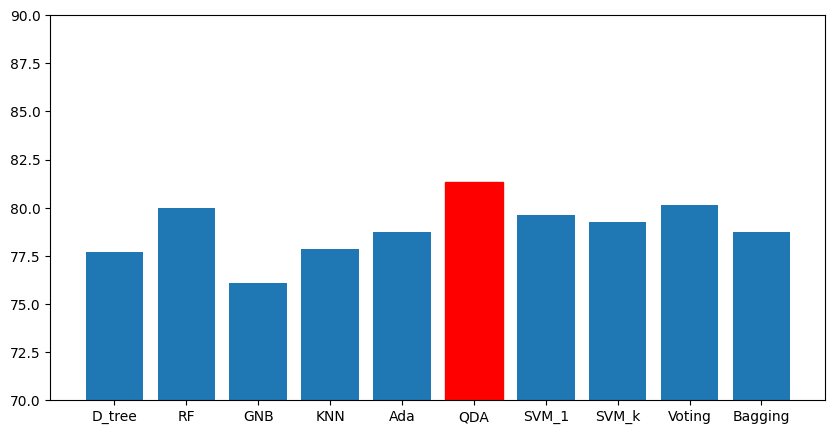

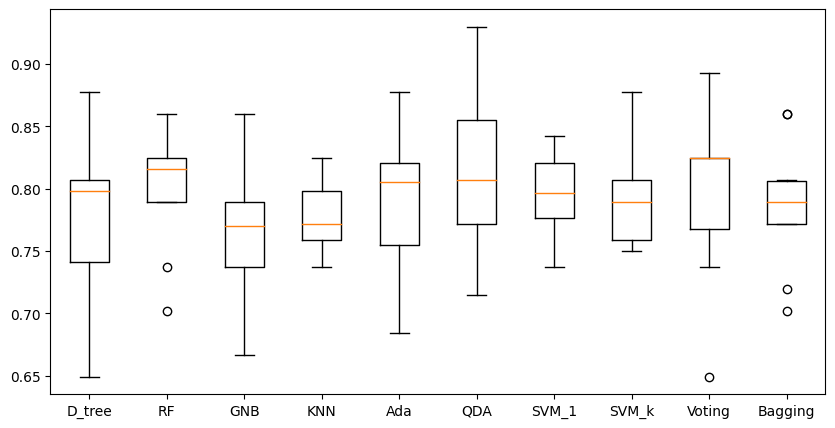

In [974]:
## 결측치 제거 데이터셋
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
# from xgboost import XGBClassifier



clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

# 사용할 분류기를 모두 지정
classifier = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              GaussianNB(),
              KNeighborsClassifier(),
              SVC(kernel='linear'),
              SVC(kernel='rbf'),
              AdaBoostClassifier(),
              QuadraticDiscriminantAnalysis(),
              VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                           ('2', RandomForestClassifier()),
                                           ('3', SVC(kernel='linear'))]),
              BaggingClassifier(estimator=clf3, n_estimators=10, random_state=0),
              
              ]

#각 분류기의 이름을 지정
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'Voting',
                    'Bagging',
                                        ]

#결과가 지정될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행해 결과를 저장
classifier_data = zip(classifier_names, classifier)
for classifier_name, classifier in classifier_data:
    #계층별 교차 검증 환경 설정
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    #교차 검증을 통해 정확도 계산
    accuracies = cross_val_score(classifier, X=X_train_drop, y=y_train_drop, cv = skf)
    #정확도의 평균값을 출력
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    
    
    #결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)
    
# 분류기별 정확도의 평균값을 막대 그래프로 출력
plt.figure(figsize=(10, 5))
plt.ylim([70, 90])
bars = plt.bar(modelnames, modelmeans)



# 가장 높은 값을 가진 막대의 색상 변경
max_index = np.argmax(modelmeans)
bars[max_index].set_color('red')

plt.show()

#분류기별 결과를 박스 그래프로 출력
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

# modelmeans 리스트에서 최댓값의 인덱스 찾기
max_index1 = modelmeans.index(max(modelmeans))

drop_result = modelmeans[max_index1]
drop_name = modelnames[max_index1]

### 결측치 대체(평균값) 데이터셋 훈련

Mean accuracy of D_tree : 81.57 %
Mean accuracy of RF : 83.83 %
Mean accuracy of GNB : 77.36 %
Mean accuracy of KNN : 80.31 %
Mean accuracy of Ada : 78.35 %
Mean accuracy of QDA : 82.28 %
Mean accuracy of SVM_1 : 79.60 %
Mean accuracy of SVM_k : 79.75 %
Mean accuracy of Voting : 81.30 %
Mean accuracy of Bagging : 78.76 %


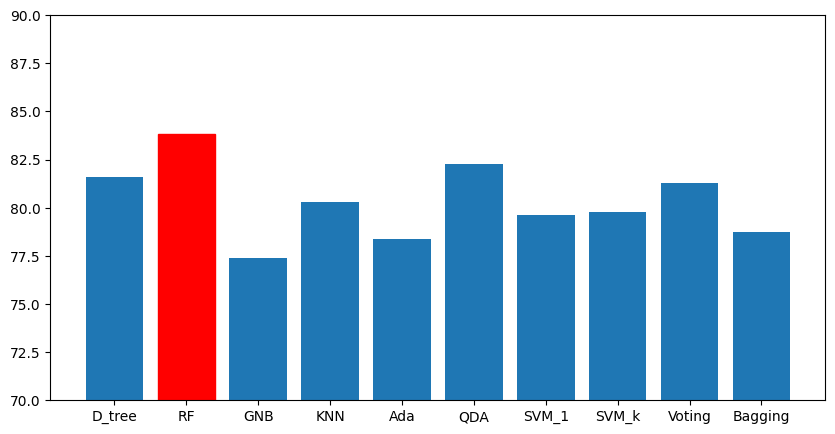

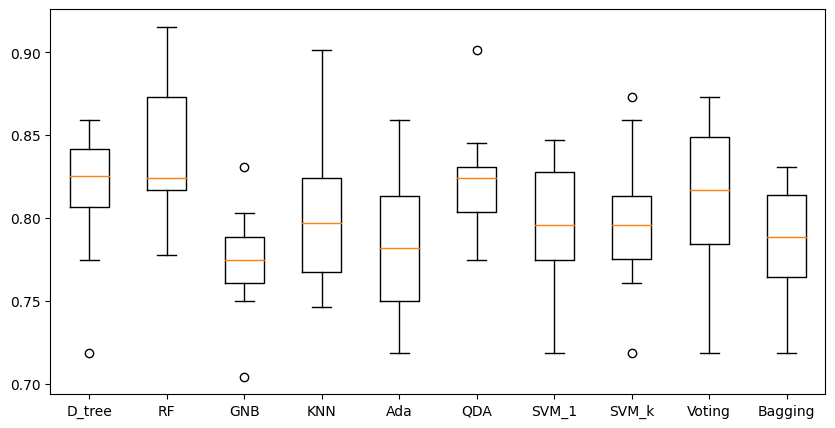

In [975]:
## 결측치 평균 대체 데이터셋

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
# from xgboost import XGBClassifier



clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

# 사용할 분류기를 모두 지정
classifier = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              GaussianNB(),
              KNeighborsClassifier(),
              SVC(kernel='linear'),
              SVC(kernel='rbf'),
              AdaBoostClassifier(),
              QuadraticDiscriminantAnalysis(),
              VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                           ('2', RandomForestClassifier()),
                                           ('3', SVC(kernel='linear'))]),
              BaggingClassifier(estimator=clf3, n_estimators=10, random_state=0),
              
              ]

#각 분류기의 이름을 지정
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'Voting',
                    'Bagging',
                                        ]

#결과가 지정될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행해 결과를 저장
classifier_data = zip(classifier_names, classifier)
for classifier_name, classifier in classifier_data:
    #계층별 교차 검증 환경 설정
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    #교차 검증을 통해 정확도 계산
    accuracies = cross_val_score(classifier, X=X_train_mean, y=y_train_mean, cv = skf)
    #정확도의 평균값을 출력
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    
    
    #결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)
    
# 분류기별 정확도의 평균값을 막대 그래프로 출력
plt.figure(figsize=(10, 5))
plt.ylim([70, 90])
bars = plt.bar(modelnames, modelmeans)

# 가장 높은 값을 가진 막대의 색상 변경
max_index = np.argmax(modelmeans)
bars[max_index].set_color('red')

plt.show()

#분류기별 결과를 박스 그래프로 출력
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

# modelmeans 리스트에서 최댓값의 인덱스 찾기
max_index1 = modelmeans.index(max(modelmeans))

mean_result = modelmeans[max_index1]
mean_name = modelnames[max_index1]

### 결측치 대체(중앙값) 데이터셋 훈련

Mean accuracy of D_tree : 82.42 %
Mean accuracy of RF : 82.85 %
Mean accuracy of GNB : 77.07 %
Mean accuracy of KNN : 80.18 %
Mean accuracy of Ada : 78.34 %
Mean accuracy of QDA : 82.42 %
Mean accuracy of SVM_1 : 80.74 %
Mean accuracy of SVM_k : 79.61 %
Mean accuracy of Voting : 80.73 %
Mean accuracy of Bagging : 78.34 %


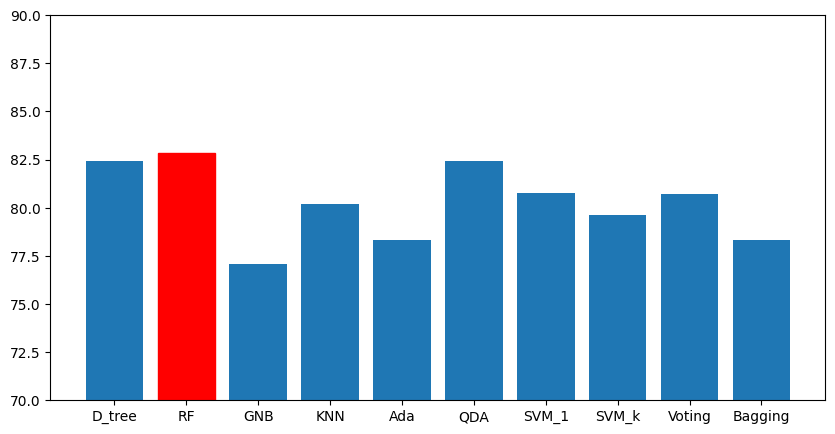

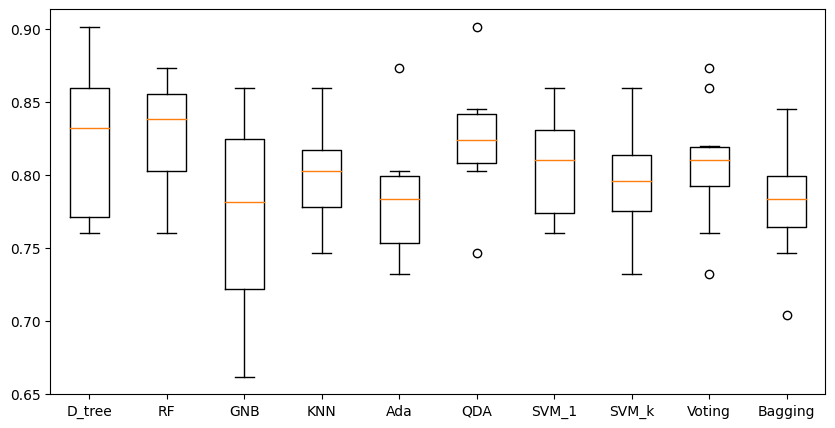

In [976]:
## 결측치 중앙값 대체 데이터셋


## 결측치 예측 데이터셋
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
# from xgboost import XGBClassifier



clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

# 사용할 분류기를 모두 지정
classifier = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              GaussianNB(),
              KNeighborsClassifier(),
              SVC(kernel='linear'),
              SVC(kernel='rbf'),
              AdaBoostClassifier(),
              QuadraticDiscriminantAnalysis(),
              VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                           ('2', RandomForestClassifier()),
                                           ('3', SVC(kernel='linear'))]),
              BaggingClassifier(estimator=clf3, n_estimators=10, random_state=0),
              
              ]

#각 분류기의 이름을 지정
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'Voting',
                    'Bagging',
                                        ]

#결과가 지정될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행해 결과를 저장
classifier_data = zip(classifier_names, classifier)
for classifier_name, classifier in classifier_data:
    #계층별 교차 검증 환경 설정
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    #교차 검증을 통해 정확도 계산
    accuracies = cross_val_score(classifier, X=X_train_median, y=y_train_median, cv = skf)
    #정확도의 평균값을 출력
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    
    
    #결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)
    
# 분류기별 정확도의 평균값을 막대 그래프로 출력
plt.figure(figsize=(10, 5))
plt.ylim([70, 90])
bars = plt.bar(modelnames, modelmeans)

# 가장 높은 값을 가진 막대의 색상 변경
max_index = np.argmax(modelmeans)
bars[max_index].set_color('red')

plt.show()

#분류기별 결과를 박스 그래프로 출력
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

# modelmeans 리스트에서 최댓값의 인덱스 찾기
max_index1 = modelmeans.index(max(modelmeans))

median_result = modelmeans[max_index1]
median_name = modelnames[max_index1]

### 결측치 대체(최빈값) 데이터셋 훈련

Mean accuracy of D_tree : 83.40 %
Mean accuracy of RF : 84.54 %
Mean accuracy of GNB : 77.21 %
Mean accuracy of KNN : 81.86 %
Mean accuracy of Ada : 78.34 %
Mean accuracy of QDA : 82.28 %
Mean accuracy of SVM_1 : 79.89 %
Mean accuracy of SVM_k : 80.31 %
Mean accuracy of Voting : 80.31 %
Mean accuracy of Bagging : 78.48 %


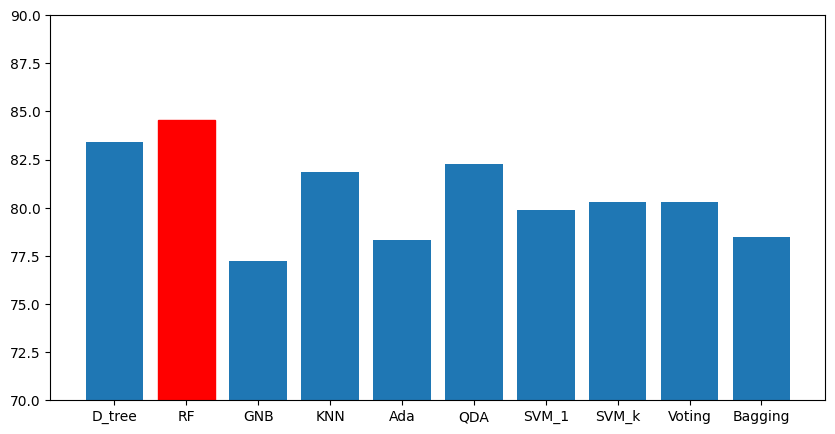

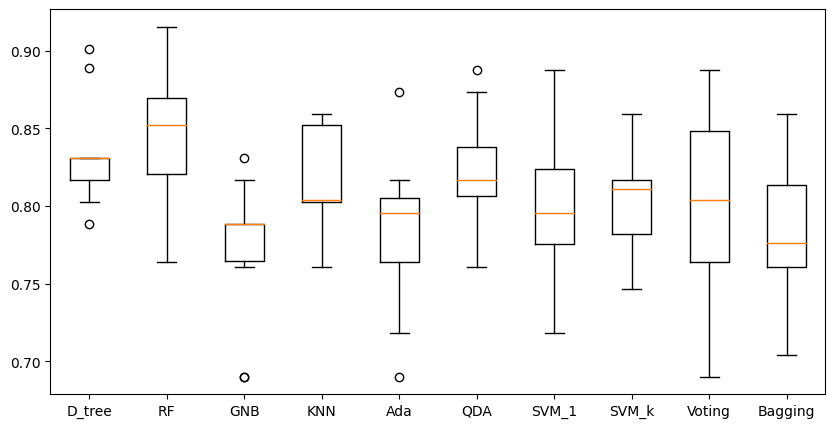

In [977]:
## 결측치 최빈값 대체 데이터셋

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
# from xgboost import XGBClassifier



clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

# 사용할 분류기를 모두 지정
classifier = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              GaussianNB(),
              KNeighborsClassifier(),
              SVC(kernel='linear'),
              SVC(kernel='rbf'),
              AdaBoostClassifier(),
              QuadraticDiscriminantAnalysis(),
              VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                           ('2', RandomForestClassifier()),
                                           ('3', SVC(kernel='linear'))]),
              BaggingClassifier(estimator=clf3, n_estimators=10, random_state=0),
              
              ]

#각 분류기의 이름을 지정
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'Voting',
                    'Bagging',
                                        ]

#결과가 지정될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행해 결과를 저장
classifier_data = zip(classifier_names, classifier)
for classifier_name, classifier in classifier_data:
    #계층별 교차 검증 환경 설정
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    #교차 검증을 통해 정확도 계산
    accuracies = cross_val_score(classifier, X=X_train_mode, y=y_train_mode, cv = skf)
    #정확도의 평균값을 출력
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    
    
    #결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)
    
# 분류기별 정확도의 평균값을 막대 그래프로 출력
plt.figure(figsize=(10, 5))
plt.ylim([70, 90])
bars = plt.bar(modelnames, modelmeans)

# 가장 높은 값을 가진 막대의 색상 변경
max_index = np.argmax(modelmeans)
bars[max_index].set_color('red')

plt.show()

#분류기별 결과를 박스 그래프로 출력
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

# modelmeans 리스트에서 최댓값의 인덱스 찾기
max_index1 = modelmeans.index(max(modelmeans))

mode_result = modelmeans[max_index1]
mode_name = modelnames[max_index1]

### 결측치 예측값 데이터셋 훈련

Mean accuracy of D_tree : 79.46 %
Mean accuracy of RF : 80.73 %
Mean accuracy of GNB : 76.79 %
Mean accuracy of KNN : 81.30 %
Mean accuracy of Ada : 76.64 %
Mean accuracy of QDA : 81.43 %
Mean accuracy of SVM_1 : 79.75 %
Mean accuracy of SVM_k : 79.89 %
Mean accuracy of Voting : 79.05 %
Mean accuracy of Bagging : 77.21 %


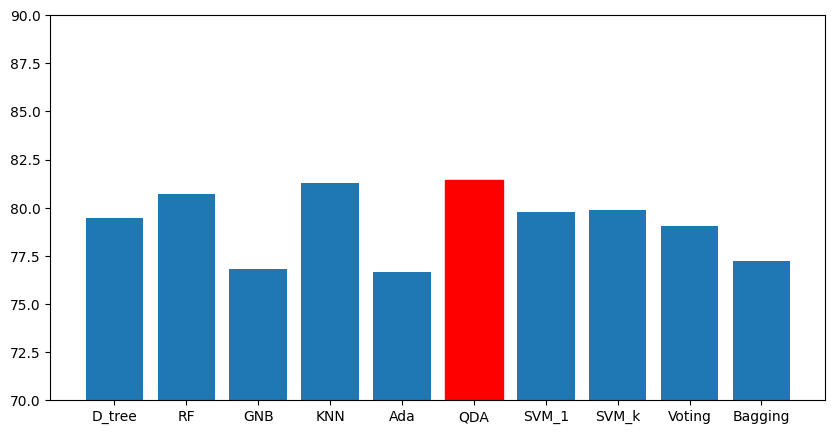

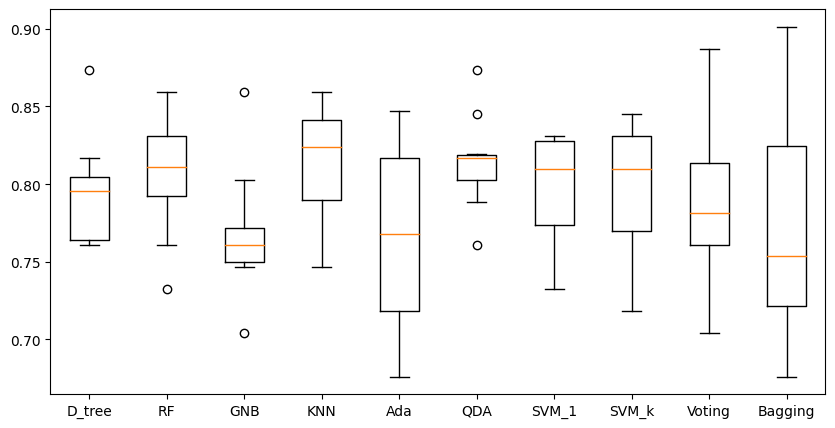

In [978]:
## 결측치 예측 데이터셋

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
# from xgboost import XGBClassifier



clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

# 사용할 분류기를 모두 지정
classifier = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              GaussianNB(),
              KNeighborsClassifier(),
              SVC(kernel='linear'),
              SVC(kernel='rbf'),
              AdaBoostClassifier(),
              QuadraticDiscriminantAnalysis(),
              VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                           ('2', RandomForestClassifier()),
                                           ('3', SVC(kernel='linear'))]),
              BaggingClassifier(estimator=clf3, n_estimators=10, random_state=0),
              
              ]

#각 분류기의 이름을 지정
classifier_names = ['D_tree',
                    'RF',
                    'GNB',
                    'KNN',
                    'Ada',
                    'QDA',
                    'SVM_1',
                    'SVM_k',
                    'Voting',
                    'Bagging',
                                        ]

#결과가 지정될 리스트를 만듭니다.
modelaccuracies = []
modelmeans = []
modelnames = []

# 각 분류기를 실행해 결과를 저장
classifier_data = zip(classifier_names, classifier)
for classifier_name, classifier in classifier_data:
    #계층별 교차 검증 환경 설정
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    #교차 검증을 통해 정확도 계산
    accuracies = cross_val_score(classifier, X=X_train_combined, y=y_train_combined, cv = skf)
    #정확도의 평균값을 출력
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    
    
    #결과를 저장합니다.
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)
    
# 분류기별 정확도의 평균값을 막대 그래프로 출력
plt.figure(figsize=(10, 5))
plt.ylim([70, 90])
bars = plt.bar(modelnames, modelmeans)

# 가장 높은 값을 가진 막대의 색상 변경
max_index = np.argmax(modelmeans)
bars[max_index].set_color('red')

plt.show()

#분류기별 결과를 박스 그래프로 출력
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()

# modelmeans 리스트에서 최댓값의 인덱스 찾기
max_index1 = modelmeans.index(max(modelmeans))

combined_result = modelmeans[max_index1]
combined_name = modelnames[max_index1]

### 최종 비교

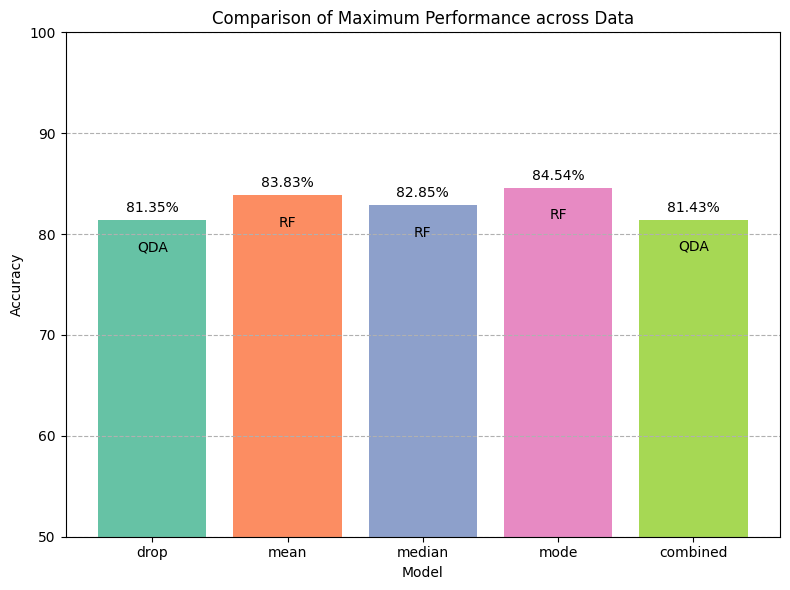

In [983]:
import matplotlib.pyplot as plt
import numpy as np

# 결과값 비교를 위한 데이터 준비
data_labels = ["drop", "mean", "median", "mode", "combined"]
results = [drop_result, mean_result, median_result, mode_result, combined_result]
model_names = [drop_name, mean_name, median_name, mode_name, combined_name]  # 모델 이름 리스트

# 컬러맵 설정
cmap = plt.get_cmap("Set2")
colors = cmap(np.arange(len(data_labels)))

# 결과값 시각화
plt.figure(figsize=(8, 6))
bars = plt.bar(data_labels, results, color=colors)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Comparison of Maximum Performance across Data")

# 결과값과 모델 이름 주석 추가
for i, result in enumerate(results):
    plt.text(i, result + 0.5, f"{result:.2f}%", ha='center', va='bottom', color='black')

    # 모델 이름 표시
    plt.text(i, result - 2, model_names[i], ha='center', va='top', color='black')

plt.ylim([50, 100])  # y축 범위 설정
plt.grid(axis='y', linestyle='--')  # y축 그리드 라인 추가

plt.tight_layout()  # 그래프 요소들 간격 조정
plt.show()
